<a href="https://colab.research.google.com/github/s178998/student-math-score-prediction-tf/blob/main/Math_score_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes:

/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


25/25 - 0s - 5ms/step - loss: 64.6386
Epoch 4/100
25/25 - 0s - 8ms/step - loss: 64.0509
Epoch 5/100
25/25 - 0s - 6ms/step - loss: 63.4280
Epoch 6/100
25/25 - 0s - 12ms/step - loss: 62.7169
Epoch 7/100
25/25 - 0s - 13ms/step - loss: 61.9913
Epoch 8/100
25/25 - 0s - 6ms/step - loss: 61.2507
Epoch 9/100
25/25 - 0s - 5ms/step - loss: 60.4264
Epoch 10/100
25/25 - 0s - 6ms/step - loss: 59.4524
Epoch 11/100
25/25 - 0s - 12ms/step - loss: 58.5136
Epoch 12/100
25/25 - 0s - 13ms/step - loss: 57.3989
Epoch 13/100
25/25 - 0s - 11ms/step - loss: 56.2587
Epoch 14/100
25/25 - 0s - 5ms/step - loss: 55.0608
Epoch 15/100
25/25 - 0s - 4ms/step - loss: 53.5630
Epoch 16/100
25/25 - 0s - 6ms/step - loss: 52.2693
Epoch 17/100
25/25 - 0s - 6ms/step - loss: 50.7545
Epoch 18/100
25/25 - 0s - 6ms/step - loss: 49.1328
Epoch 19/100
25/25 - 0s - 6ms/step - loss: 47.3415
Epoch 20/100
25/25 - 0s - 5ms/step - loss: 45.4240
Epoch 21/100
25/25 - 0s - 6ms/step - loss: 43.6463
Epoch 22/100
25/25 - 0s - 5ms/step - loss: 41

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
MSE: 46.35, MAE: 5.40, MSLE: 0.06, Poisson Deviance: 0.92
MAPE: 439235534389248.00, Pinball Loss: 2.70, R2 Score: 0.81


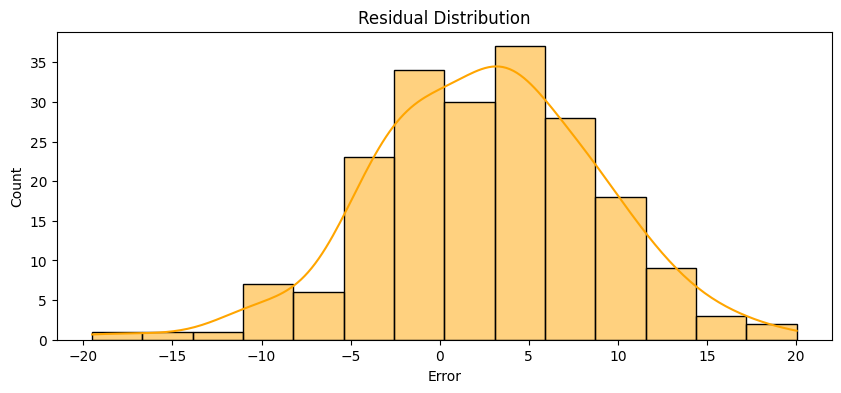

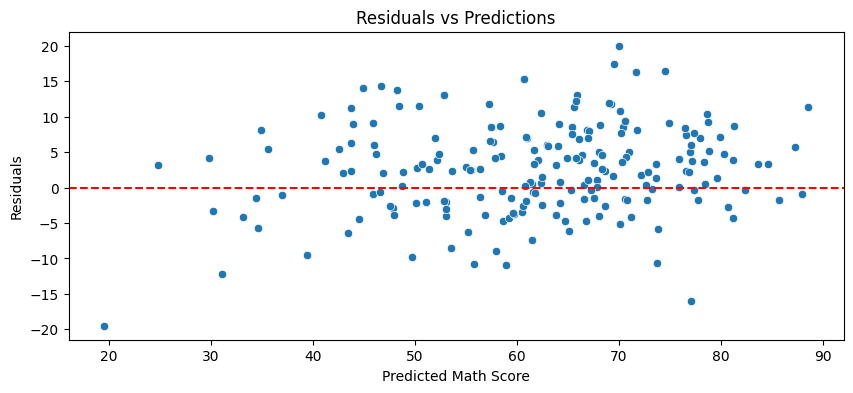

In [11]:
# Title: Predicting Mathh Score Using Linear Regression
# Author: Ayodeji Osungbohun
# Project goal: This project's goal is takes in values from the dataset to predict a future math score


import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_squared_log_error, mean_poisson_deviance, mean_absolute_percentage_error, mean_pinball_loss
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Reproducibility
np.random.seed(0)
tf.random.set_seed(0)



# Load and clean data
df = pd.read_csv('/content/sample_data/StudentsPerformance.csv') # From kaggle

print(df.dtypes)
print(df.info())

df = df.drop_duplicates()

# Features & target
x = df.drop('math score', axis=1)
y = df['math score']

df['writing_reading_score'] = df['writing score'] / df['reading score'] # Feature engineering

# Preprocessing
categorical_features = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
numerical_col = ['writing score', 'reading score']

preprocessed = ColumnTransformer([
    ('num', StandardScaler(), numerical_col),
    ('cat', OneHotEncoder(drop='first'), categorical_features)
])

x_processed = preprocessed.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_processed, y, test_size=0.2, random_state=42)

# Updated model with Dropout & BatchNorm
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(x_train.shape[1],)),

    tf.keras.layers.Dense(82),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.3),  # Dropout layer added

    tf.keras.layers.Dense(35),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_absolute_error')

early_stopper = EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=100, batch_size=32, verbose=2, callbacks=[early_stopper])

model.save("my_math_model.h5")


# Predictions
y_pred = model.predict(x_test).flatten()

# Metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)
mpd = mean_poisson_deviance(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mpl = mean_pinball_loss(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.2f}, MAE: {mae:.2f}, MSLE: {msle:.2f}, Poisson Deviance: {mpd:.2f}')
print(f'MAPE: {mape:.2f}, Pinball Loss: {mpl:.2f}, R2 Score: {r2:.2f}')

print

# Residual Plots
residuals = y_test - y_pred


plt.figure(figsize=(10, 4))
sns.histplot(residuals, kde=True, color='orange')

plt.title('Residual Distribution')
plt.xlabel('Error')
plt.show()

plt.figure(figsize=(10, 4))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predictions')
plt.xlabel('Predicted Math Score')
plt.ylabel('Residuals')
plt.show()




